# TNM112 -- Teaching Session 3 

## Introduction to Convolutional Neural Network

In this notebook, we will define and train a convolutional neural network using Keras framework. If you get stuck at any tasks, check the [keras](https://keras.io/api/) documentation for more information. The solution will be uploaded by the end of the teaching session, so that you can verify with your implementation.  

In [1]:
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import clear_output
import random
import pandas as pd

seed = 42
np.random.seed(seed)

# 1. SimpleCNN

In this section, we will train a simple convolutional neural network to classify different classes in CIFAR10 dataset. Here, we will walk through the implementation steps so you can use this information to train multiple classifiers in the upcoming sections.

## 1. 1. Load CIFAR10 Dataset

For the dataset, we use CIFAR10. CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

In the cell below, you will load the training and test datasets separately from `keras`, convert the class labels to one-hot vectors, and print the shape of the dataset. 

In [2]:
from keras.datasets import cifar10

# load CIFAR10 from keras.datasets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('=======================================================================')
print('CIFAR10 Dataset Split:')
print('x train shape = ', x_train.shape)
print('y train shape = ', y_train.shape)
print('x test shape = ', x_test.shape)
print('y test shape = ', y_test.shape)
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# One hot encoding of class labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print('=======================================================================')
print('After One Hot Encoding:')
print('x train shape = ', x_train.shape)
print('y train shape = ', y_train.shape)
print('x test shape = ', x_test.shape)
print('y test shape = ', y_test.shape)
print('=======================================================================')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
CIFAR10 Dataset Split:
x train shape =  (50000, 32, 32, 3)
y train shape =  (50000, 1)
x test shape =  (10000, 32, 32, 3)
y test shape =  (10000, 1)
After One Hot Encoding:
x train shape =  (50000, 32, 32, 3)
y train shape =  (50000, 10)
x test shape =  (10000, 32, 32, 3)
y test shape =  (10000, 10)


As you can see, the `x_train` and `x_shape` has a shape of [N x 32 x 32 x 3], where N is the length of the corresponding dataset, 32 x 32 are the image resolution and 3 corresponds to the RGB channels of the images. 

**Note:** During the last teaching session, we used MNIST dataset, which were grayscale images. So the number of channels in that case was 1.  

## 1.2. Visualize CIFAR10 data

In the cell below, we use the plot functions from the previous teaching session to plot the training images, along with the corresponding labels.

CIFAR10:


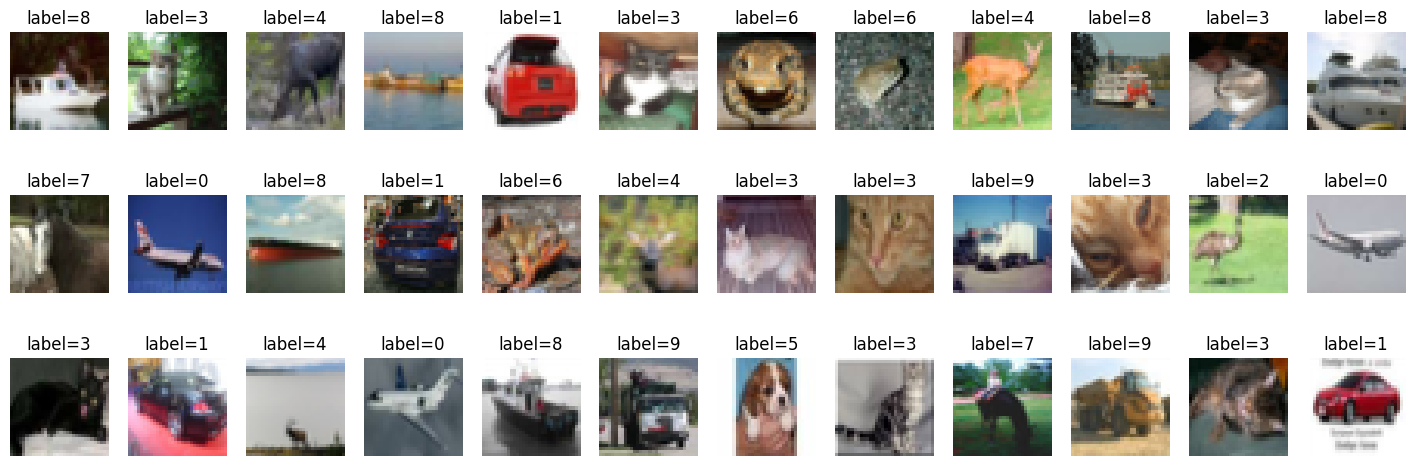

In [3]:
#Visualize CIFAR-10 dataset     
def imgrid(x,y,yp,xx,yy):
    ind = [i for i in range(x.shape[0])]
    random.shuffle(ind)

    plt.figure(figsize=(18,yy*2))
    for i in range(xx*yy):
        plt.subplot(yy,xx,i+1)
        if x.shape[3]==1:
            plt.imshow(x[ind[i],:,:,0],cmap='gray')
        else:
            plt.imshow(x[ind[i],:,:,:])

        if len(yp)>0:
            plt.title('p=%d, gt=%d'%(yp[ind[i]],y[ind[i]]))
        else:
            plt.title('label=%d'%(y[ind[i]]))
        plt.axis('off')
    plt.show()

print('CIFAR10:')
print('===================================================================================================================')
imgrid(x_train,np.argmax(y_train,1),[],12,3)
print('===================================================================================================================')

## 1.3. Model Definition

In the cell below, we define a simple convolutional neural network (SimpleCNN) with two convolutional blocks using keras. 

**Network Architecture:**

   1. **`Convolutional Layer 1:`** a Conv2D layer with 32 filters, 3x3 kernel, ReLU activation, and input shape (32, 32, 3).
   2. **`MaxPool Layer 1:`** a MaxPooling2D layer with a 2x2 pooling window.
   3. **`Convolutional Layer 2:`** Another Conv2D layer with 64 filters, 3x3 kernel, and ReLU activation.
   4. **`MaxPool Layer 2:`** Another MaxPooling2D layer with a 2x2 pooling window.
   5. **`Flatten:`** a Flatten layer to convert feature maps to a 1D vector.
   6. **`Dense Layer 1:`** a Dense layer with 512 units and ReLU activation.
   7. **`Output Layer:`** a Dense layer with 10 units and softmax activation.

In [4]:
from keras import layers

# Define a sequential model from keras and add convolutional blocks
model = keras.Sequential(name="SimpleCNN")

# Add a Conv2D layer with 32 filters, 3x3 kernel, ReLU activation, and input shape (32, 32, 3).
model.add(layers.Conv2D(32, (3,3), padding="same", activation='relu', input_shape = x_train.shape[1:], name="Layer-1"))

# Add a MaxPooling2D layer with a 2x2 pooling window.
model.add(layers.MaxPool2D((2,2),name="Layer-2"))

# Add another Conv2D layer with 64 filters, 3x3 kernel, and ReLU activation.
model.add(layers.Conv2D(64, (3,3), padding="same", activation='relu', name="Layer-3"))

# Add another MaxPooling2D layer with a 2x2 pooling window.
model.add(layers.MaxPool2D((2,2), name="Layer-4"))

# Add a Flatten layer to convert feature maps to a 1D vector.
model.add(layers.Flatten(name="Layer-5"))

# Add a Dense layer with 512 units and ReLU activation.
model.add(layers.Dense(512, activation='relu', name="Layer-6"))

# Add a Dense layer with 10 units and softmax activation.
model.add(layers.Dense(10, activation='softmax', name="Layer-7"))

model.summary()

c:\Users\Marcus Sjöblom\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "SimpleCNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Layer-1 (Conv2D)                │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer-2 (MaxPooling2D)          │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer-3 (Conv2D)                │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer-4 (MaxPooling2D)          │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer-5 (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer-6 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer-7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,122,186 (8.10 MB)

 Trainable params: 2,122,186 (8.10 MB)

 Non-trainable params: 0 (0.00 B)

## 1.4. Model Training

In the cell below, the CNN will be trained based on the following hyperparameters.

- **Optimizer:**  Adam optimizer

- **Learning Rate:** 0.001

- **Loss Function:** categorical_crossentropy

- **Epochs:** 20

- **Validation Split:** 20%

- **Validation Frequency:** 5 (Model computes validation after every 5 epochs)

- **Batch Size:** 7

- **Metrics:** Accuracy

**Note:** In this session, we use a validation dataset to assess whether the model is overfitting or underfitting. Instead of manually splitting the dataset for validation, we specify the validation_split parameter in Keras's `fit()` method, which automatically partitions the training dataset for validation during model training.

In [5]:
# Define optimizer with learning rate
opt = keras.optimizers.Adam(learning_rate=0.001)

# Compile the model for training
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Model training and store the trainings result in a log
log = model.fit(x_train, y_train, batch_size=256, epochs=20,
          validation_split=0.2, validation_freq=5,verbose=True);#Select a lower batch_size if you run out of memory

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 228ms/step - accuracy: 0.3579 - loss: 1.7767
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 230ms/step - accuracy: 0.5735 - loss: 1.2136
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 227ms/step - accuracy: 0.6405 - loss: 1.0263
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 238ms/step - accuracy: 0.6766 - loss: 0.9275
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 264ms/step - accuracy: 0.7048 - loss: 0.8517 - val_accuracy: 0.6782 - val_loss: 0.9258
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 228ms/step - accuracy: 0.7401 - loss: 0.7530
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 242ms/step - accuracy: 0.7593 - loss: 0.6961
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 236ms/step - accuracy: 0.7851 - loss: 0.6261
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 232ms/step - accuracy: 0.8051 - loss: 0.5708
Epoch 10/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 252ms/step - accuracy: 0.8226 - loss: 0.5204 - val_accuracy: 0.7201 - val_loss: 0.8580
Epoch 11/20
157/157 ━━━━━

## 1.5. Plot the performance curves

We define a function `plot_curve` to visualize the training loss and accuracy from the above training process using `matplotlib`.

In [6]:
#Function to plot loss and accuracy curves
def plot_curve(log):
    N_train = len(log.history['loss'])
    N_valid = len(log.history['val_loss'])
    
    plt.figure(figsize=(18,4))
    
    # Plot loss on training and validation set
    plt.subplot(1,2,1)
    plt.plot(log.history['loss'])
    plt.plot(np.linspace(0,N_train-1,N_valid), log.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.grid('on')
    plt.legend(['Train', 'Validation'])
    
    # Plot accuracy on training and validation set
    plt.subplot(1,2,2)
    plt.plot(log.history['accuracy'])
    plt.plot(np.linspace(0,N_train-1,N_valid), log.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.grid('on')
    plt.legend(['Train', 'Validation'])
    
    plt.show()

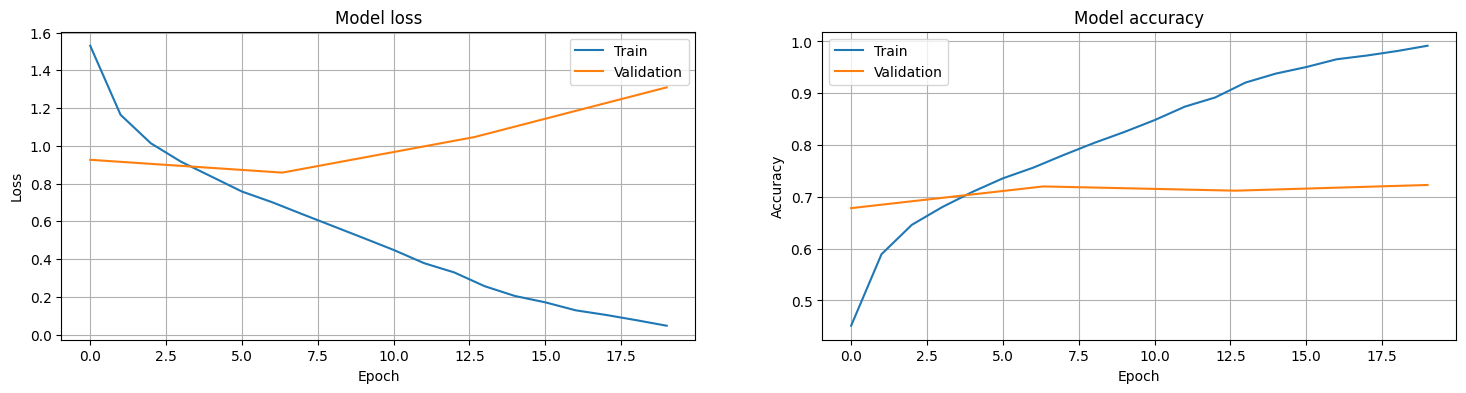

In [7]:
plot_curve(log)

## 1.6. Evaluation

In the cell below, the SimpleCNN is evaluated on the test set by computing the Mean Squared Error loss and accuracy.

In [8]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('=======================================================================')

# The first element in the score contains the MSE and second element contains the accuracy.   
print("Test loss:     ", score[0])
print("Test accuracy: ", 100*score[1])
print('=======================================================================')

# (Optional) You are free to compute other metrics (Precision, Recall and F1-score) below

Test loss:      1.3109781742095947
Test accuracy:  71.29999995231628


# 2. Addressing Overfitting and Improve Model Performance

In this section, you will explore various techniques to address the problem of overfitting in Machine Learning and to improve the performance of machine learning model.


## Task 2.1. Adding Dropout

The first technique involves using dropout. In the following cell, you will modify the previously implemented SimpleCNN by incorporating dropout layers.

**Network Architecture**:

   1. **`Convolutional Layer 1:`** a Conv2D layer with 32 filters, 3x3 kernel, ReLU activation, and input shape (32, 32, 3).
   2. **`MaxPool Layer 1:`** a MaxPooling2D layer with a 2x2 pooling window.
   3. **`Dropout Layer 1:`** a Dropout layer with the rate of 0.25
   4. **`Convolutional Layer 2:`** Another Conv2D layer with 64 filters, 3x3 kernel, and ReLU activation.
   5. **`MaxPool Layer 2:`** Another MaxPooling2D layer with a 2x2 pooling window.
   6. **`Dropout Layer 2:`** Another Dropout layer with the rate of 0.25
   7. **`Flatten:`** a Flatten layer to convert feature maps to a 1D vector.
   8. **`Dense Layer 1:`** a Dense layer with 512 units and ReLU activation.
   9. **`Dropout Layer 3:`** Another Dropout layer with the rate of 0.25
   10. **`Output Layer:`** a Dense layer with 10 units and softmax activation.

In [ ]:
# Define a sequential model from keras and add convolutional blocks
model1 = keras.Sequential(name="SimpleCNN_with_Dropout")

# Add a Conv2D layer with 32 filters, 3x3 kernel, ReLU activation, and input shape (32, 32, 3).
model1.add()

# Add a MaxPooling2D layer with a 2x2 pooling window.
model1.add()

# Add a Dropout layer with the rate of 0.25
model1.add()

# Add another Conv2D layer with 64 filters, 3x3 kernel, and ReLU activation.
model1.add()

# Add another MaxPooling2D layer with a 2x2 pooling window.
model1.add()

# Add another Dropout layer with the rate of 0.25
model1.add()

# Add a Flatten layer to convert feature maps to a 1D vector.
model1.add()

# Add a Dense layer with 512 units and ReLU activation.
model1.add()

# Add another Dropout layer with the rate of 0.25
model1.add()

# Add a Dense layer with 10 units and softmax activation.
model1.add()

model1.summary()


In [ ]:
# Configure the model for training
model1.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])
log1 = model1.fit(x_train, y_train, batch_size=256, epochs=20,
          validation_split=0.2, validation_freq=5, verbose=True); #Select a lower batch_size if you run out of memory

#Plot Loss and Accuracy curves
plot_curve(log1)

#Displaying the test performance
score1 = model1.evaluate(x_test, y_test, verbose=0)
print('=======================================================================')
print("Test loss:     ", score1[0])
print("Test accuracy: ", 100*score1[1])
print('=======================================================================')

## Task 2.2. More Layers and Kernels

The next approach is to expand the current model by increasing the number of layers and adding more kernels (filters). In the cell below, you will design a deeper Convolutional Neural Network with additional layers and a greater number of kernels compared to SimpleCNN.

**Network Architecture:**

1. **`Convolutional Layer 1:`** A Conv2D layer with 64 filters, 3x3 kernel, ReLU activation, and input shape (32, 32, 3).
2. **`Convolutional Layer 2:`** Another Conv2D layer with 64 filters, 3x3 kernel, and ReLU activation.
3. **`MaxPool Layer 1:`** A MaxPooling2D layer with a 2x2 pooling window.
4. **`Dropout Layer 1:`** A Dropout layer with a rate of 0.25.
5. **`Convolutional Layer 3:`** A Conv2D layer with 128 filters, 3x3 kernel, and ReLU activation.
6. **`Convolutional Layer 4:`** Another Conv2D layer with 128 filters, 3x3 kernel, and ReLU activation.
7. **`MaxPool Layer 2:`** A MaxPooling2D layer with a 2x2 pooling window.
8. **`Dropout Layer 2:`** A Dropout layer with a rate of 0.25.
9. **`Flatten:`** A Flatten layer to convert feature maps to a 1D vector.
10. **`Dense Layer 1:`** A Dense layer with 512 units and ReLU activation.
11. **`Dropout Layer 3:`** A Dropout layer with a rate of 0.5.
12. **`Output Layer:`** A Dense layer with 10 units and softmax activation.

In [ ]:
# Define a sequential model from keras and add convolutional blocks
model2 = keras.Sequential(name="Deeper_CNN")

# Add a Conv2D layer with 64 filters, 3x3 kernel, ReLU activation, and input shape (32, 32, 3).
model2.add()

# Add another Conv2D layer with 64 filters, 3x3 kernel, and ReLU activation.
model2.add()

# Add a MaxPooling2D layer with a 2x2 pooling window.
model2.add()

# Add a Dropout layer with a rate of 0.25.
model2.add()

# Add a Conv2D layer with 128 filters, 3x3 kernel, and ReLU activation.
model2.add()

# Add another Conv2D layer with 128 filters, 3x3 kernel, and ReLU activation.
model2.add()

# Add a MaxPooling2D layer with a 2x2 pooling window.
model2.add()

# Add a Dropout layer with a rate of 0.25.
model2.add()

# Add a Flatten layer to convert feature maps to a 1D vector.
model2.add()

# Add a Dense layer with 512 units and ReLU activation.
model2.add()

# Add a Dropout layer with a rate of 0.5.
model2.add()

# Add a Dense layer with 10 units and softmax activation.
model2.add()
model2.summary()

In [ ]:
#Configure the model for training
model2.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])
log2 = model2.fit(x_train, y_train, batch_size=256, epochs=20,
          validation_split=0.2, validation_freq=5, verbose=True); #Select a lower batch_size if you run out of memory

#Plot Loss and Accuracy curves
plot_curve(log2)

#Displaying the test performance
score2 = model2.evaluate(x_test, y_test, verbose=0)
print('=======================================================================')
print("Test loss:     ", score2[0])
print("Test accuracy: ", 100*score2[1])
print('=======================================================================')

## Task 2.3. Batch Normalization

The next technique involves using Batch Normalization to improve the training process and stabilize the learning. In the cell below, you will add BatchNormalization layers to the model, which will normalize the activations and gradients, helping to accelerate training and reduce sensitivity to initialization.

**Network Architecture:**

1. **`Convolutional Layer 1:`** A Conv2D layer with 64 filters, 3x3 kernel, ReLU activation, He uniform kernel initializer, and input shape (32, 32, 3).  
2. **`Batch Normalization 1:`** A BatchNormalization layer to normalize the activations of the previous layer.  
3. **`Convolutional Layer 2:`** Another Conv2D layer with 64 filters, 3x3 kernel, ReLU activation, and He uniform kernel initializer.  
4. **`Batch Normalization 2:`** A BatchNormalization layer to normalize the activations of the previous layer.  
5. **`MaxPool Layer 1:`** A MaxPooling2D layer with a 2x2 pooling window.  
6. **`Dropout Layer 1:`** A Dropout layer with a rate of 0.3.  
7. **`Convolutional Layer 3:`** A Conv2D layer with 128 filters, 3x3 kernel, ReLU activation, and He uniform kernel initializer.  
8. **`Batch Normalization 3:`** A BatchNormalization layer to normalize the activations of the previous layer.  
9. **`Convolutional Layer 4:`** Another Conv2D layer with 128 filters, 3x3 kernel, ReLU activation, and He uniform kernel initializer.  
10. **`Batch Normalization 4:`** A BatchNormalization layer to normalize the activations of the previous layer.  
11. **`MaxPool Layer 2:`** A MaxPooling2D layer with a 2x2 pooling window.  
12. **`Dropout Layer 2:`** A Dropout layer with a rate of 0.4.  
13. **`Flatten:`** A Flatten layer to convert feature maps to a 1D vector.  
14. **`Dense Layer 1:`** A Dense layer with 256 units, ReLU activation, and He uniform kernel initializer.  
15. **`Batch Normalization 5:`** A BatchNormalization layer to normalize the activations of the previous layer.  
16. **`Dropout Layer 3:`** A Dropout layer with a rate of 0.5.  
17. **`Output Layer:`** A Dense layer with 10 units and softmax activation.  


In [ ]:
# Define a sequential model from keras and add convolutional blocks
model3 = keras.Sequential(name="CNN_with_BatchNorm")

# Add a Conv2D layer with 64 filters, 3x3 kernel, ReLU activation, He uniform kernel initializer, and input shape (32, 32, 3).
model3.add()

# Add a BatchNormalization layer to normalize the activations of the previous layer.
model3.add()

# Add another Conv2D layer with 64 filters, 3x3 kernel, ReLU activation, and He uniform kernel initializer.
model3.add()

# Add a BatchNormalization layer to normalize the activations of the previous layer.
model3.add()

# Add a MaxPooling2D layer with a 2x2 pooling window.
model3.add()

# Add a Dropout layer with a rate of 0.3.
model3.add()

# Add a Conv2D layer with 128 filters, 3x3 kernel, ReLU activation, and He uniform kernel initializer.
model3.add()

# Add a BatchNormalization layer to normalize the activations of the previous layer.
model3.add()

# Add another Conv2D layer with 128 filters, 3x3 kernel, ReLU activation, and He uniform kernel initializer.
model3.add()

# Add a BatchNormalization layer to normalize the activations of the previous layer.
model3.add()

# Add a MaxPooling2D layer with a 2x2 pooling window.
model3.add()

# Add a Dropout layer with a rate of 0.4.
model3.add()

# Add a Flatten layer to convert feature maps to a 1D vector.
model3.add()

# Add a Dense layer with 256 units, ReLU activation, and He uniform kernel initializer.
model3.add()

# Add a BatchNormalization layer to normalize the activations of the previous layer.
model3.add()

# Add a Dropout layer with a rate of 0.5.
model3.add()

# Add a Dense layer with 10 units and softmax activation.
model3.add()

model3.summary()

In [ ]:
#Configure the model for training
model3.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])
log3 = model3.fit(x_train, y_train, batch_size=256, epochs=30,
          validation_split=0.2, validation_freq=5, verbose=True); #Select a lower batch_size if you run out of memory

#Plot Loss and Accuracy curves
plot_curve(log3)

#Displaying the test performance
score3 = model3.evaluate(x_test, y_test, verbose=0)
print('=======================================================================')
print("Test loss:     ", score3[0])
print("Test accuracy: ", 100*score3[1])
print('=======================================================================')

**Note:** As we are adding more layers and parameters to the network, we will increase the number of epochs to achieve better results.

## Task 2.4. Data Augmentation

The next approach involves applying data augmentation techniques to enhance the diversity of the training data. In the cell below, you will implement random rotation, translation, flipping, and contrast adjustments to augment the dataset and improve the model’s generalization.

**Network Architecture:**

1. **`Augmentation 1:`** A RandomRotation layer with a rotation factor of 0.05.  
2. **`Augmentation 2:`** A RandomTranslation layer with horizontal and vertical translation of 0.1.  
3. **`Augmentation 3:`** A RandomFlip layer with horizontal flipping.  
4. **`Augmentation 4:`** A RandomContrast layer with a contrast adjustment factor of 0.2.  
5. **`Convolutional Layer 1:`** A Conv2D layer with 64 filters, 3x3 kernel, ReLU activation, He uniform kernel initializer, and input shape (32, 32, 3).  
6. **`Batch Normalization 1:`** A BatchNormalization layer to normalize the activations of the previous layer.  
7. **`Convolutional Layer 2:`** Another Conv2D layer with 64 filters, 3x3 kernel, ReLU activation, and He uniform kernel initializer.  
8. **`Batch Normalization 2:`** A BatchNormalization layer to normalize the activations of the previous layer.  
9. **`MaxPool Layer 1:`** A MaxPooling2D layer with a 2x2 pooling window.  
10. **`Dropout Layer 1:`** A Dropout layer with a rate of 0.3.  
11. **`Convolutional Layer 3:`** A Conv2D layer with 128 filters, 3x3 kernel, ReLU activation, and He uniform kernel initializer.  
12. **`Batch Normalization 3:`** A BatchNormalization layer to normalize the activations of the previous layer.  
13. **`Convolutional Layer 4:`** Another Conv2D layer with 128 filters, 3x3 kernel, ReLU activation, and He uniform kernel initializer.  
14. **`Batch Normalization 4:`** A BatchNormalization layer to normalize the activations of the previous layer.  
15. **`MaxPool Layer 2:`** A MaxPooling2D layer with a 2x2 pooling window.  
16. **`Dropout Layer 2:`** A Dropout layer with a rate of 0.4.  
17. **`Flatten:`** A Flatten layer to convert feature maps to a 1D vector.  
18. **`Dense Layer 1:`** A Dense layer with 256 units, ReLU activation, and He uniform kernel initializer.  
19. **`Batch Normalization 5:`** A BatchNormalization layer to normalize the activations of the previous layer.  
20. **`Dropout Layer 3:`** A Dropout layer with a rate of 0.5.  
21. **`Output Layer:`** A Dense layer with 10 units and softmax activation.  


In [ ]:
# Define a sequential model from keras and add convolutional blocks
model4 = keras.Sequential(name="CNN_with_Data_Aug")

# Add an Input Layer for Data Augmentation
model4.add(layers.InputLayer(x_train.shape[1:]))

# Add a RandomRotation layer with a rotation factor of 0.05.
model4.add()

# Add a RandomTranslation layer with horizontal and vertical translation of 0.1.
model4.add()

# Add a RandomFlip layer with horizontal flipping.
model4.add()

# Add a RandomContrast layer with a contrast adjustment factor of 0.2.
model4.add()

# Add a Conv2D layer with 64 filters, 3x3 kernel, ReLU activation, He uniform kernel initializer, and input shape (32, 32, 3).
model4.add()

# Add a BatchNormalization layer to normalize the activations of the previous layer.
model4.add()

# Add another Conv2D layer with 64 filters, 3x3 kernel, ReLU activation, and He uniform kernel initializer.
model4.add()

# Add a BatchNormalization layer to normalize the activations of the previous layer.
model4.add()

# Add a MaxPooling2D layer with a 2x2 pooling window.
model4.add()

# Add a Dropout layer with a rate of 0.3.
model4.add()

# Add a Conv2D layer with 128 filters, 3x3 kernel, ReLU activation, and He uniform kernel initializer.
model4.add()

# Add a BatchNormalization layer to normalize the activations of the previous layer.
model4.add()

# Add another Conv2D layer with 128 filters, 3x3 kernel, ReLU activation, and He uniform kernel initializer.
model4.add()

# Add a BatchNormalization layer to normalize the activations of the previous layer.
model4.add()

# Add a MaxPooling2D layer with a 2x2 pooling window.
model4.add()

# Add a Dropout layer with a rate of 0.4.
model4.add()

# Add a Flatten layer to convert feature maps to a 1D vector.
model4.add()

# Add a Dense layer with 256 units, ReLU activation, and He uniform kernel initializer.
model4.add()

# Add a BatchNormalization layer to normalize the activations of the previous layer.
model4.add()

# Add a Dropout layer with a rate of 0.5.
model4.add()

# Add a Dense layer with 10 units and softmax activation.
model4.add()

model4.summary()

In [ ]:
#Configure the model for training
model4.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])
log4 = model4.fit(x_train, y_train, batch_size=256, epochs=50,
          validation_split=0.2, validation_freq=5, verbose=True); #Select a lower batch_size if you run out of memory

#Plot Loss and Accuracy curves
plot_curve(log4)

#Displaying the test performance
score4 = model4.evaluate(x_test, y_test, verbose=0)
print('=======================================================================')
print("Test loss:     ", score4[0])
print("Test accuracy: ", 100*score4[1])
print('=======================================================================')

**Note:** As we are adding more layers and parameters to the network, we will increase the number of epochs to achieve better results.

## 2.5 Display the results

In the following cell, we will display the results from various models trained during the session. We will assess the models using the test set to obtain accuracy and loss, and present them in a bar graph.

In [ ]:
results = {"Accuracy":[100*score[1],100*score1[1],100*score2[1],100*score3[1],100*score4[1]],
          "Loss":[score[0],score1[0],score2[0],score3[0],score4[0]]}

df = pd.DataFrame(results, index = ["SimpleCNN", "SimpleCNN with Dropout", "Deeper CNN", "CNN with BatchNorm", "CNN with Data Aug"])
print(df)

In [ ]:
models = ["SimpleCNN", "Dropout", "DCNN", "BatchNorm", "DataAug"]
acc = results["Accuracy"]
loss = results["Loss"]

fig = plt.figure(figsize =(15, 5))
plt.subplot(1, 2, 1)
# creating the bar plot
plt.bar(models, acc, color ='red', 
        width = 0.4)
plt.xlabel("Models")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
# creating the bar plot
plt.bar(models, loss, color ='blue', 
        width = 0.4)
plt.xlabel("Models")
plt.ylabel("Loss")
plt.suptitle("Model Performance")
plt.show()